<a href="https://colab.research.google.com/github/SimonHuy/Plastic-Project/blob/main/Plastic_vs_OrganicTrash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
# Directories with training pictures
train_biological_dir = os.path.join("/content/drive/MyDrive/Plastic_vs_OrganicTrash/train/biological")
train_plastic_dir = os.path.join("/content/drive/MyDrive/Plastic_vs_OrganicTrash/train/plastic")


train_biological_names = os.listdir(train_biological_dir)
train_plastic_names = os.listdir(train_plastic_dir)


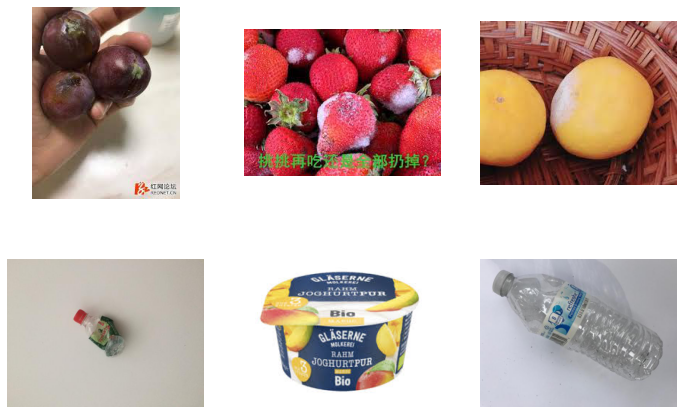

In [4]:
# Visualize some pictures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 3
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 3
next_biological_pix = [os.path.join(train_biological_dir, fname) 
    for fname in train_biological_names[0:pic_index]]
next_plastic_pix = [os.path.join(train_plastic_dir, fname) 
    for fname in train_plastic_names[0:pic_index]]

for i,img_path in enumerate(next_biological_pix + next_plastic_pix):
  sp =plt.subplot(nrows, ncols, i + 1)
  sp.axis("Off")
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [16]:
BATCHSIZE = 100
TRAINING_DIR = "/content/drive/MyDrive/Plastic_vs_OrganicTrash/train"
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest")

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCHSIZE,
                                                    class_mode ="binary",
                                                    target_size = (150,150))


VALIDATING_DIR = "/content/drive/MyDrive/Plastic_vs_OrganicTrash/valid"    
valid_datagen = ImageDataGenerator(rescale = 1.0/255)
                                   

valid_generator = valid_datagen.flow_from_directory(VALIDATING_DIR,
                                                    batch_size = BATCHSIZE,
                                                    class_mode = "binary",
                                                    target_size = (150,150))                          

Found 1400 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation= "relu"),
                                    tf.keras.layers.Conv2D(64,(3,3), activation= "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), activation= "relu"),
                                    tf.keras.layers.Conv2D(128,(3,3), activation= "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512,activation = "relu"),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)       

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99 accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [20]:
model.compile(optimizer=RMSprop(learning_rate = 0.0001),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [21]:
history = model.fit(train_generator,
                    validation_data= valid_generator,
                    epochs = 20,
                    verbose = 1,
                    callbacks = [callbacks])
                    

Epoch 1/20
14/14 [==============================] - 58s 4s/step - loss: 0.5396 - accuracy: 0.7650 - val_loss: 0.2372 - val_accuracy: 0.9118
Epoch 2/20
14/14 [==============================] - 56s 4s/step - loss: 0.3180 - accuracy: 0.8657 - val_loss: 0.1757 - val_accuracy: 0.9216
Epoch 3/20
14/14 [==============================] - 55s 4s/step - loss: 0.2660 - accuracy: 0.8879 - val_loss: 0.1197 - val_accuracy: 0.9542
Epoch 4/20
14/14 [==============================] - 56s 4s/step - loss: 0.2733 - accuracy: 0.8964 - val_loss: 0.1256 - val_accuracy: 0.9542
Epoch 5/20
14/14 [==============================] - 55s 4s/step - loss: 0.2491 - accuracy: 0.9050 - val_loss: 0.1243 - val_accuracy: 0.9575
Epoch 6/20
14/14 [==============================] - 55s 4s/step - loss: 0.2685 - accuracy: 0.9000 - val_loss: 0.1160 - val_accuracy: 0.9673
Epoch 7/20
14/14 [==============================] - 55s 4s/step - loss: 0.2394 - accuracy: 0.9064 - val_loss: 0.1648 - val_accuracy: 0.9412
Epoch 8/20
14/14 [==

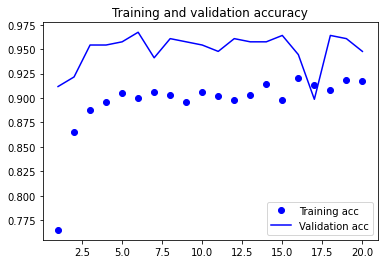

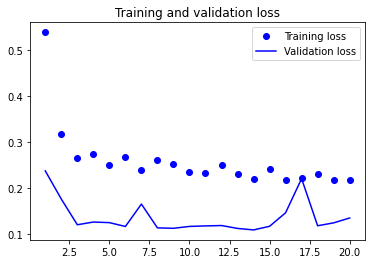

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving biological (1).jpg to biological (1) (11).jpg
Saving biological (2).jpg to biological (2) (10).jpg
Saving plastic (3).jpg to plastic (3) (2).jpg
Saving plastic (6).jpg to plastic (6) (3).jpg


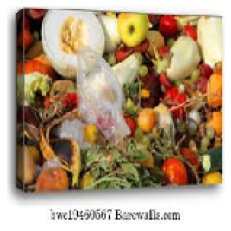

biological (1).jpg [[0.]] This is ORGANIC TRASH


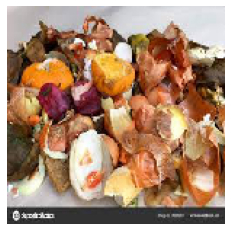

biological (2).jpg [[0.]] This is ORGANIC TRASH


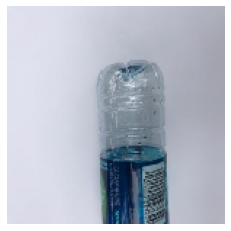

plastic (3).jpg [[1.]] This is a PLASTIC


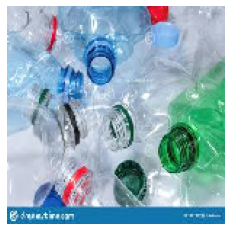

plastic (6).jpg [[1.]] This is a PLASTIC


In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  ListOfOrganic = []
  ListOfPlastic = []
  if classes < 0.5:
    # Visualize some pictures
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    ListOfOrganic.append(img)

    for i,img_path in enumerate(ListOfOrganic):
      sp =plt.subplot(1, 1, i + 1)
      sp.axis("Off")
      
      plt.imshow(img)
      plt.show()
      print(fn, classes, "This is ORGANIC TRASH")
  else:
    ListOfPlastic.append(img)

    for i,img_path in enumerate(ListOfPlastic):
      sp =plt.subplot(1, 1, i + 1)
      sp.axis("Off")
      
      plt.imshow(img)
      plt.show()
      print(fn, classes, "This is a PLASTIC")
  